In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skopt import gp_minimize
from skopt.plots import (
    plot_gaussian_process,
    plot_convergence,
)

# from niapy.algorithms.basic import (
#     ParticleSwarmAlgorithm,
#     GeneticAlgorithm,
#     GreyWolfOptimizer,
#     DifferentialEvolution,
#     MothFlameOptimizer,
# )
# from niapy.algorithms.other import (
#     HillClimbAlgorithm,
#     SimulatedAnnealing,
# )
# from niapy.task import Task
# from niapy.problems import Problem

from scipy.optimize import (
    curve_fit, 
    shgo, 
    direct,
    Bounds,
)

from mealpy import (
    FloatVar,
    Problem,
    PSO,
    MFO,
    EFO,
    ASO,
    MA,
    ACOR,
    BBO,
    GSKA,
    SA,
)

# Define colors as in Gnuplot
RED = '#DD181F'
GREEN = '#5E9C36'
BLUE = '#0060AD'
ORCHID = '#BA55D3'
PERU = '#CD853F'
GRAY = '#696969'
BLACK = '#000000'
DARKTURQUOISE = '#00CED1'
ORANGE = '#F89441'
MAGENTA = '#FF00FF'
YELLOW = '#F7F09A'

# Define figure parameters
FS = (13, 12)
DPI = 150*4
SMALL_SIZE = 10
MEDIUM_SIZE = 16
BIGGER_SIZE = 26

cmap = sns.diverging_palette(
    h_neg=18,
    h_pos=248,
    s=140,
    as_cmap=True,
)
sns.set_context("poster")
sns.set_theme(font="Times New Roman", font_scale=2)
sns.color_palette("husl", 9)

def nint(x):
    nx = int(x + (x % (1 if x >= 0 else -1)))
    return nx

In [48]:
# D = 30
# PS = 100
# ME = 500
# lb = 2
# ub = 8
# npoints = 25

In [49]:
# def objective_function(x):
#     f0 = 418.982887272433706274786435195600708690615100*D
#     f = f0 - np.sum(x*np.sin(np.sqrt(np.abs(x))))
#     return f

# problem_dict = {
#     "bounds": FloatVar(lb=(lb,) * D, ub=(ub,) * D, name="delta"),
#     "obj_func": fitness_function,  # my_problem, # objective_function, #
#     "minmax": "min",
#     "log_to": None, #"file",
# #    "log_file": "result.log",
# }

# model1 = PSO.AIW_PSO(epoch=ME, pop_size=PS, c1=2.05, c2=2.05, alpha=0.8)
# model2 = PSO.OriginalPSO(epoch=ME, pop_size=PS, c1=2.05, c2=2.05, w_min=0.7, w_max=0.8)
# model3 = MFO.OriginalMFO(epoch=ME, pop_size=PS)
# model4 = EFO.DevEFO(epoch=ME, pop_size=PS, r_rate = 0.3, ps_rate = 0.95, p_field = 0.3, n_field = 0.5)
# model5 = ASO.OriginalASO(epoch=ME, pop_size=PS, alpha = 50, beta = 0.2)
# model6 = MA.OriginalMA(epoch=ME, pop_size=PS, pc = 0.85, pm = 0.15, p_local = 0.5, max_local_gens = 10, bits_per_param = 4)

# g_best1 = model1.solve(problem_dict)
# g_best2 = model2.solve(problem_dict)
# g_best3 = model3.solve(problem_dict)
# g_best4 = model4.solve(problem_dict)
# g_best5 = model5.solve(problem_dict)
# g_best6 = model6.solve(problem_dict)

# print(f"Model: {model1.name}, Solution: {g_best1.solution}, Fitness: {g_best1.target.fitness}")
# print(f"Model: {model2.name}, Solution: {g_best2.solution}, Fitness: {g_best2.target.fitness}")
# print(f"Model: {model3.name}, Solution: {g_best3.solution}, Fitness: {g_best3.target.fitness}")
# print(f"Model: {model4.name}, Solution: {g_best4.solution}, Fitness: {g_best4.target.fitness}")
# print(f"Model: {model5.name}, Solution: {g_best5.solution}, Fitness: {g_best5.target.fitness}")
# print(f"Model: {model6.name}, Solution: {g_best6.solution}, Fitness: {g_best6.target.fitness}")

In [50]:
def objective_function(x):
    f = np.sin(x) + np.sin(10.*x/3.)
    return f

def fitness_function(a):
    predicted = np.sin(x_data) + np.sin(a * x_data)
    diff = predicted - y_data
    mae = np.mean(np.abs(diff))
    return mae

In [67]:
D = 1
ME = 500
PS = 80
lb = 2.
ub = 8.
npoints = 20

x_data = np.linspace(lb, ub, npoints)
y_data = objective_function(x_data) + (2*np.random.rand(npoints)-1)/2

#pd.DataFrame(x_data).to_csv('out.csv', index=False)

with open('out.csv', 'w') as f:
    for i in range(npoints):
        print(x_data[i],',',y_data[i], file=f)

In [52]:
problem_dict1 = {
    "bounds": FloatVar(lb=(lb,) * D, ub=(ub,) * D, name="delta"),
    "obj_func": fitness_function,
    "minmax": "min",
    "log_to": None, #"file",
#    "log_file": "result.log",
}

model1 = PSO.AIW_PSO(epoch=ME, pop_size=PS, c1=2.05, c2=2.05, alpha=0.8)
model2 = PSO.OriginalPSO(epoch=ME, pop_size=PS, c1=2.05, c2=2.05, w_min=0.7, w_max=0.8)
model3 = MFO.OriginalMFO(epoch=ME, pop_size=PS)
model4 = EFO.DevEFO(epoch=ME, pop_size=PS, r_rate = 0.3, ps_rate = 0.95, p_field = 0.3, n_field = 0.5)
model5 = ASO.OriginalASO(epoch=ME, pop_size=PS, alpha = 50, beta = 0.2)
model6 = MA.OriginalMA(epoch=ME, pop_size=PS, pc = 0.85, pm = 0.15, p_local = 0.5, max_local_gens = 10, bits_per_param = 4)
model7 = ACOR.OriginalACOR(epoch=ME, pop_size=PS, sample_count = 25, intent_factor = 0.5, zeta = 1.0)
model8 = BBO.DevBBO(epoch=ME, pop_size=PS, p_m=0.01, n_elites=2)
model9 = GSKA.DevGSKA(epoch=ME, pop_size=PS, pb = 0.1, kr = 0.9)
model10= SA.GaussianSA(epoch=ME, pop_size=2, temp_init = 100, cooling_rate = 0.99, scale = 0.1)

g_best1 = model1.solve(problem_dict1)
model = model1
g_best = g_best1
nm = 1
# g_best2 = model2.solve(problem_dict1)
# if (g_best2.target.fitness < g_best.target.fitness):
#     model = model2
#     g_best = g_best2
#     nm = 2
# g_best3 = model3.solve(problem_dict1)
# if (g_best3.target.fitness < g_best.target.fitness):
#     model = model3
#     g_best = g_best3
#     nm = 3
# g_best4 = model4.solve(problem_dict1)
# if (g_best4.target.fitness < g_best.target.fitness):
#     model = model4
#     g_best = g_best4
#     nm = 4
# g_best5 = model5.solve(problem_dict1)
# if (g_best5.target.fitness < g_best.target.fitness):
#     model = model5
#     g_best = g_best5
#     nm = 5
# g_best6 = model6.solve(problem_dict1)
# if (g_best6.target.fitness < g_best.target.fitness):
#     model = model6
#     g_best = g_best6
#     nm = 6
# g_best7 = model7.solve(problem_dict1)
# if (g_best7.target.fitness < g_best.target.fitness):
#     model = model7
#     g_best = g_best7
#     nm = 7
# g_best8 = model8.solve(problem_dict1)
# if (g_best8.target.fitness < g_best.target.fitness):
#     model = model8
#     g_best = g_best8
#     nm = 8
# g_best9 = model9.solve(problem_dict1)
# if (g_best9.target.fitness < g_best.target.fitness):
#     model = model9
#     g_best = g_best9
#     nm = 9
# g_best10 = model10.solve(problem_dict1)
# if (g_best10.target.fitness < g_best.target.fitness):
#     model = model10
#     g_best = g_best10
#     nm = 10
# g_best11 = direct(fitness_function, bounds=[(lb, ub)])
# if (g_best11.fun < g_best.target.fitness):
#     print("### => ATTENTION!")
#     nm = 11
# g_best12 = shgo(fitness_function, bounds=[(lb, ub)])
# if (g_best12.fun < g_best.target.fitness):
#     print("### => ATTENTION!")
#     nm = 12

# print(f"Model: {model1.name}, Solution: {g_best1.solution}, Fitness: {g_best1.target.fitness}")
# print(f"Model: {model2.name}, Solution: {g_best2.solution}, Fitness: {g_best2.target.fitness}")
# print(f"Model: {model3.name}, Solution: {g_best3.solution}, Fitness: {g_best3.target.fitness}")
# print(f"Model: {model4.name}, Solution: {g_best4.solution}, Fitness: {g_best4.target.fitness}")
# print(f"Model: {model5.name}, Solution: {g_best5.solution}, Fitness: {g_best5.target.fitness}")
# print(f"Model: {model6.name}, Solution: {g_best6.solution}, Fitness: {g_best6.target.fitness}")
# print(f"Model: {model7.name}, Solution: {g_best7.solution}, Fitness: {g_best7.target.fitness}")
# print(f"Model: {model8.name}, Solution: {g_best8.solution}, Fitness: {g_best8.target.fitness}")
# print(f"Model: {model9.name}, Solution: {g_best9.solution}, Fitness: {g_best9.target.fitness}")
# print(f"Model: {model10.name}, Solution: {g_best10.solution}, Fitness: {g_best10.target.fitness}")
# print(f"Model: {"DIRECT"}, Solution: {g_best11.x}, Fitness: {g_best11.fun}")
# print(f"Model: {"SHGO"}, Solution: {g_best12.x}, Fitness: {g_best12.fun}")

print("Best model: ")
print(f"#{nm}, Model: {model.name}, Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")

Best model: 
#1, Model: AIW_PSO, Solution: [3.29619074], Fitness: 0.24744914845087243


In [53]:
res = gp_minimize(fitness_function,   # the function to minimize
                  [(lb, ub)],         # the bounds on each dimension of x
                  initial_point_generator="random",
                  acq_func="gp_hedge",      # the acquisition function
                  n_calls=100,         # the number of evaluations of f
                  n_random_starts=80,  # the number of random initialization points
#                  noise=0.1**2,       # the noise level (optional)
                  n_jobs=4,
                  random_state=42)   # the random seed

In [54]:
"x^*=%.14f, f(x^*)=%.14f" % (res.x[0], res.fun)

'x^*=3.29648209870913, f(x^*)=0.24745810152808'

In [55]:
g_best.solution[0]

3.296190739739429

<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

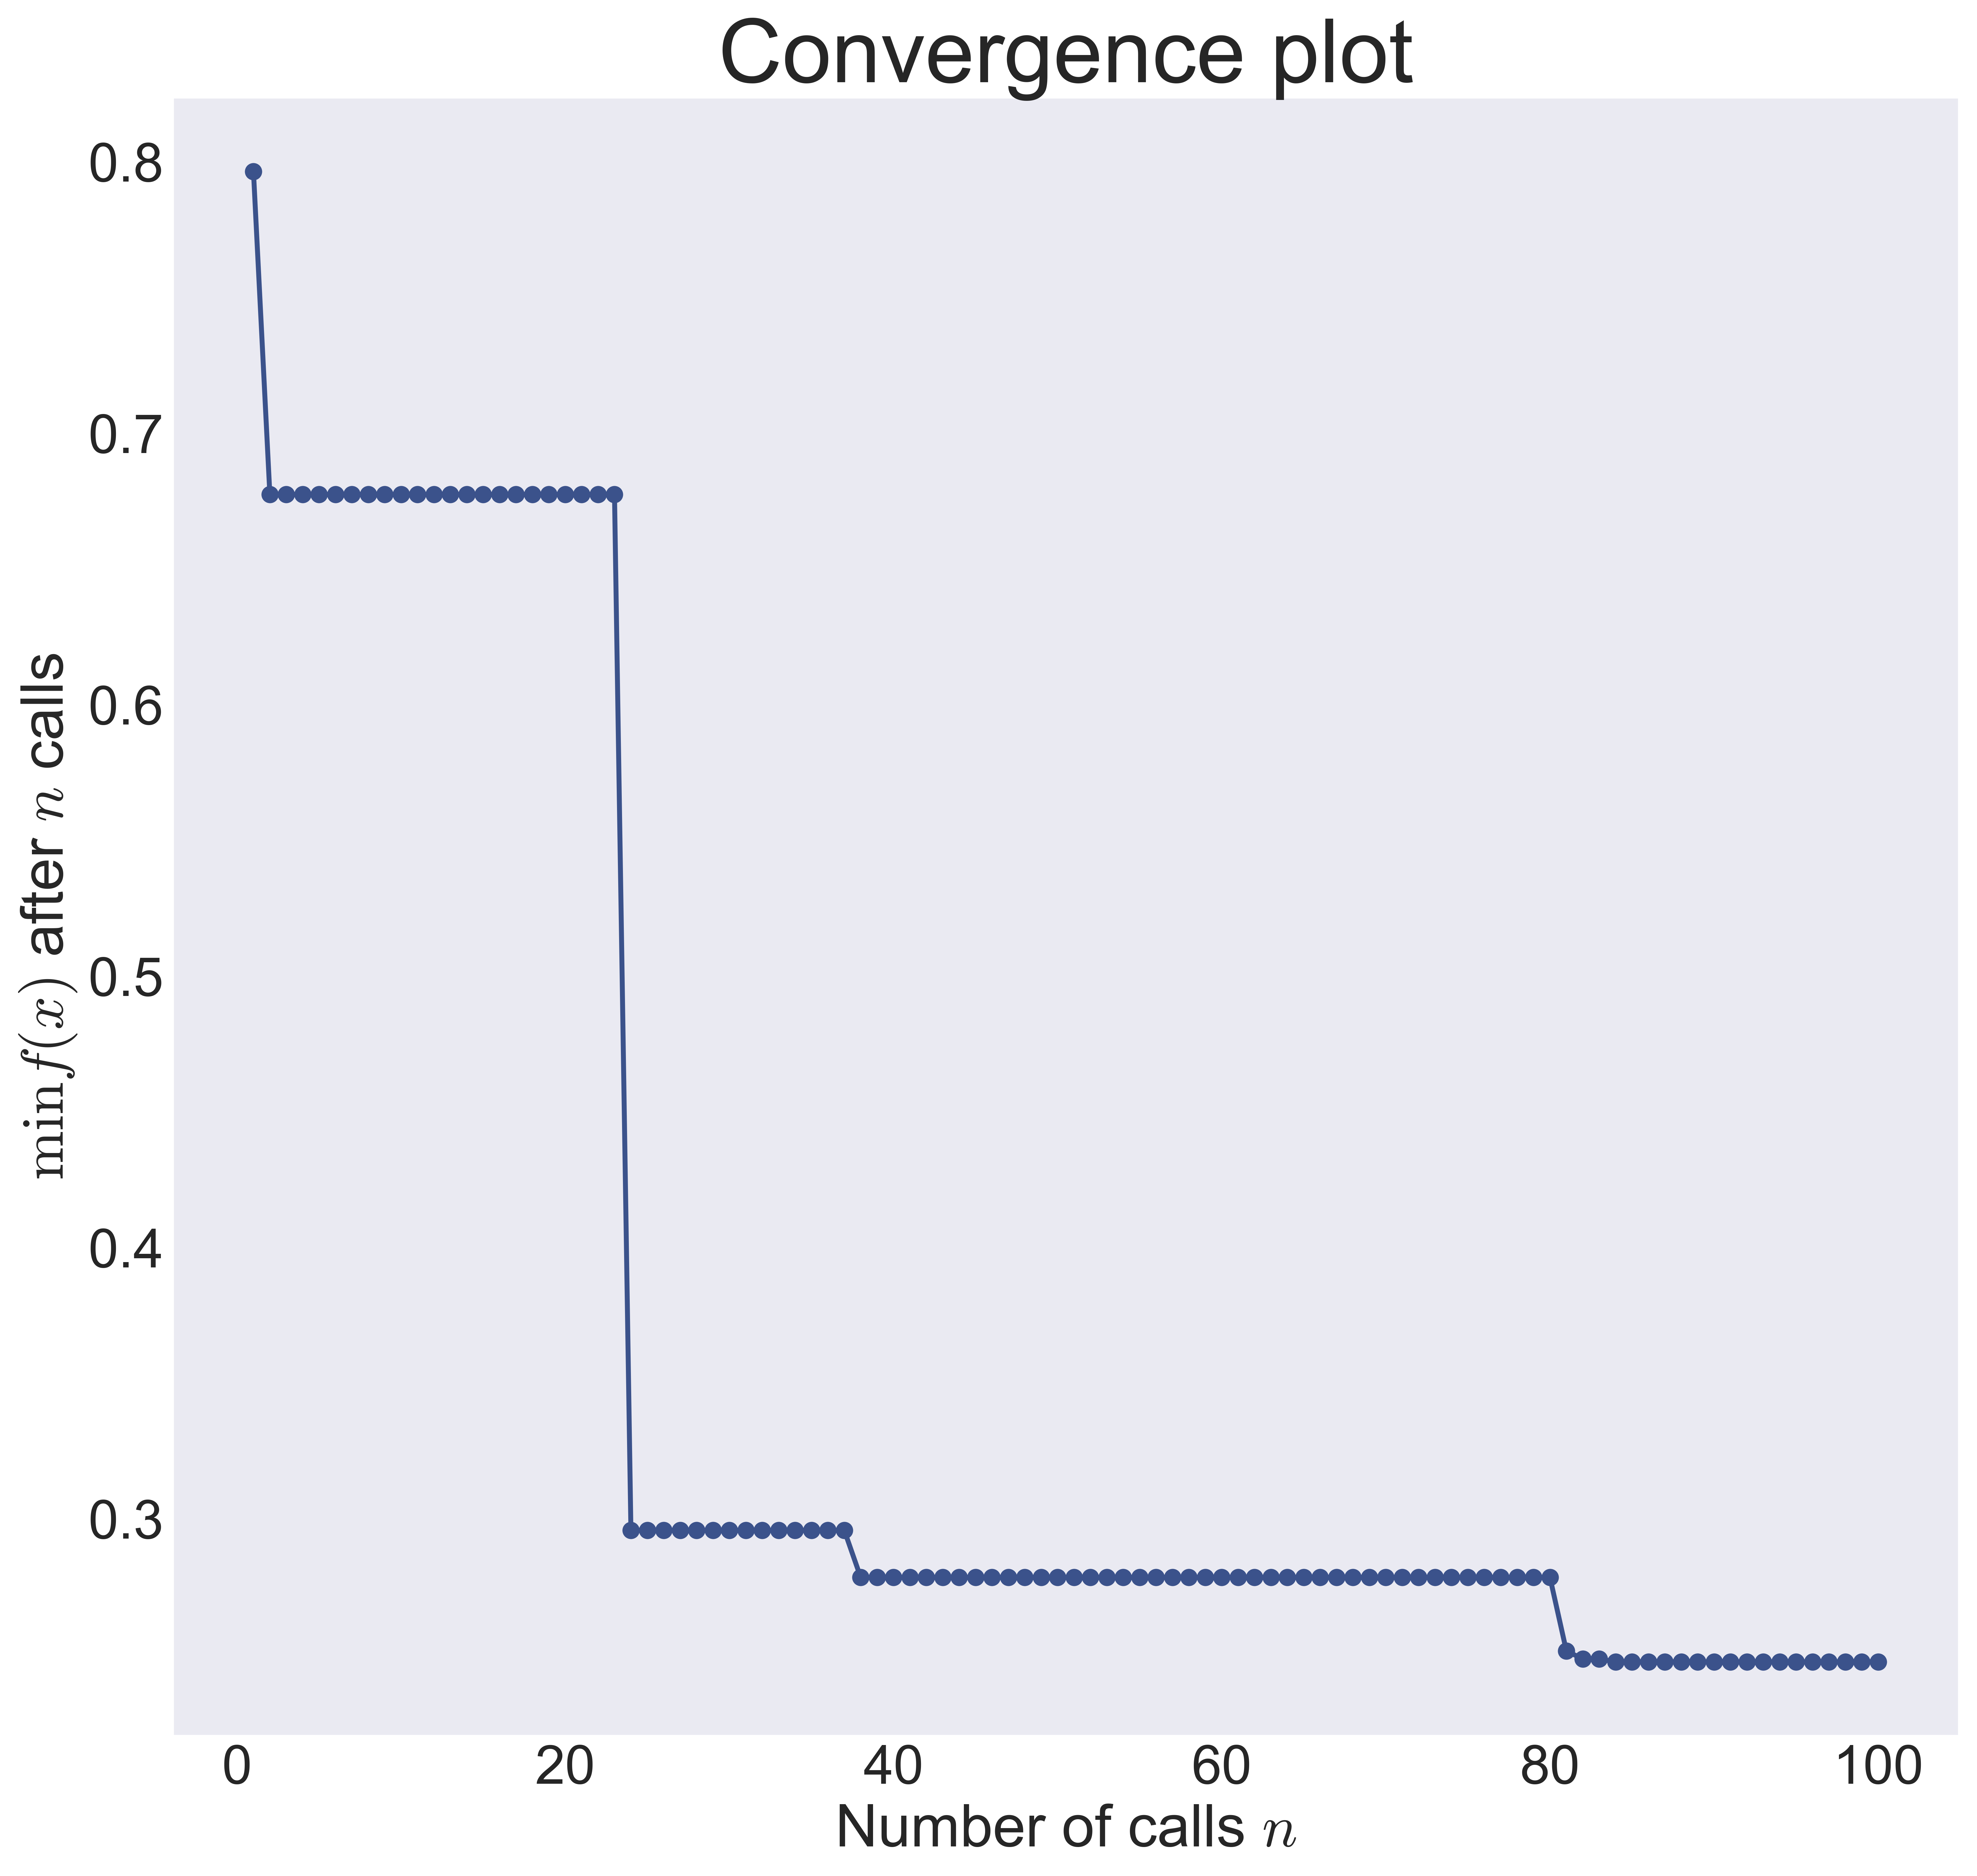

In [56]:
plt.figure(figsize=FS, dpi=DPI)
# Set default sans-serif font
plt.rcParams['font.sans-serif'] = "Times New Roman"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['mathtext.fontset'] = "cm"
plt.tick_params(axis='both', direction='in', length=5)

sns.set_theme(font="Times New Roman", font_scale=3)

plot_convergence(res)

In [57]:
def fitted_function(x):
    a1, = g_best.solution
    f = np.sin(x) + np.sin(a1*x)
    return f

In [58]:
xx = x_data[5]
yy = y_data[5]
print(f"x_data: {xx}")
print(f"y_data: {yy}")
print(f"y_function: {objective_function(xx)}")
print(f"y_fitted: {fitted_function(xx)}")

x_data: 3.5789473684210527
y_data: -1.2187199153942814
y_function: -1.0179661398449782
y_fitted: -1.1193046440361547


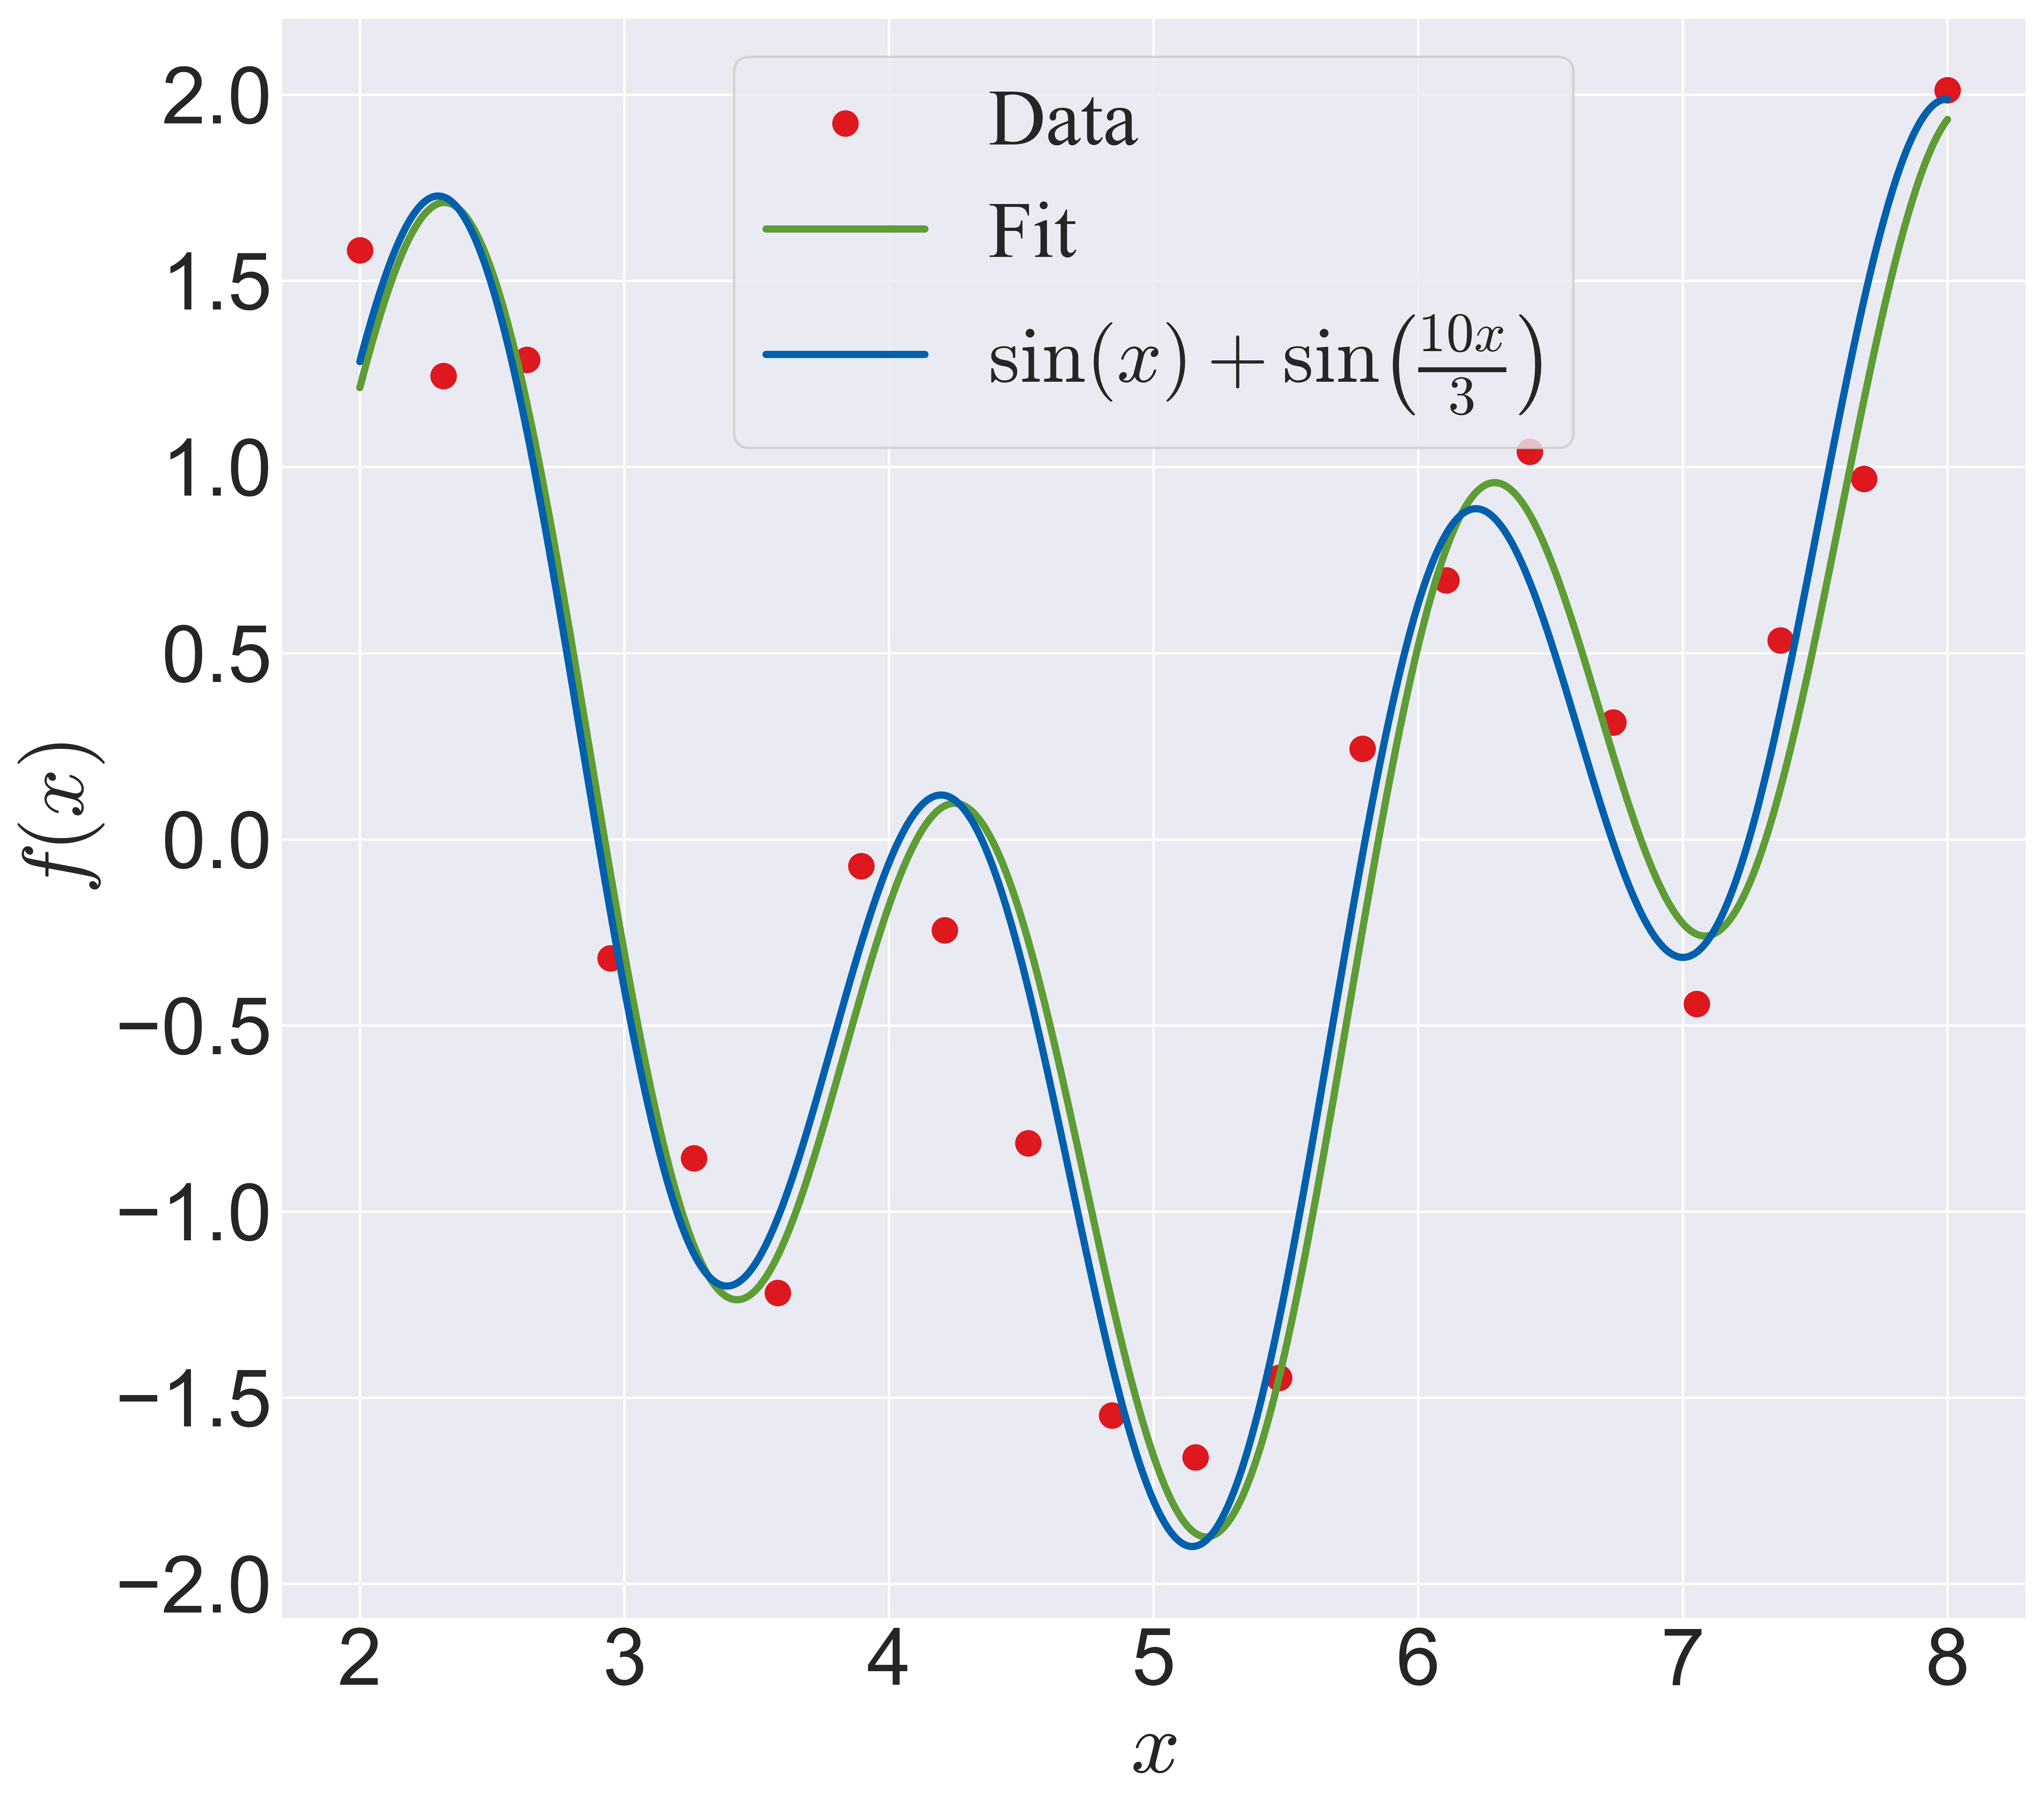

In [61]:
plt.figure(figsize=FS, dpi=DPI)
# Set default sans-serif font
plt.rcParams['font.sans-serif'] = "Times New Roman"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['mathtext.fontset'] = "cm"
plt.tick_params(axis='both', direction='in', length=5)

sns.set_theme(font="Times New Roman", font_scale=3)

plt.xlabel("$x$")
plt.ylabel("$f(x)$")

x_fun = np.linspace(lb, ub, npoints*100)
fun = objective_function(x_fun)
y_data_fit = fitted_function(x_fun)

plt.scatter(x_data, y_data, label='Data', color=RED, s=100)
plt.plot(x_fun, y_data_fit, label='Fit', color=GREEN, linewidth=3)
plt.plot(x_fun, fun, label="$\\sin(x) + \\sin\\!\\left(\\frac{10x}{3}\\right)$", color=BLUE, linewidth=3)
plt.legend(loc='best')

In [32]:
# model1.history.save_global_objectives_chart(filename="goc")
# model1.history.save_local_objectives_chart(filename="loc")

# model1.history.save_global_best_fitness_chart(color=BLUE, filename="gbfc")
# model1.history.save_local_best_fitness_chart(color=BLUE, filename="lbfc")

# model1.history.save_runtime_chart(color=BLUE, filename="rtc")

# model1.history.save_exploration_exploitation_chart(filename="eec")

# model1.history.save_diversity_chart(filename="dc")

In [33]:
D = 2
lb = 0.
ub =  5.
npoints = 11

In [34]:
with open('file.txt', 'w') as f:
    for i in range(npoints):
        xx = i*(ub-lb)/(npoints-1)+lb
        for j in range(npoints):
            yy = j*(ub-lb)/(npoints-1)+lb
            print(xx,',',yy, file=f)

In [35]:
filein = 'Test_opt_3D'
dataset = filein + '.csv'

df = pd.read_csv(dataset, encoding='cp1252')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_data  121 non-null    float64
 1   y_data  121 non-null    float64
 2   z_data  121 non-null    float64
dtypes: float64(3)
memory usage: 3.0 KB


x_data      y_data      z_data
count  121.000000  121.000000  121.000000
mean     2.500000    2.500000  117.279438
std      1.587713    1.587713  105.969460
min      0.000000    0.000000    0.000000
25%      1.000000    1.000000   34.593832
50%      2.500000    2.500000   86.226346
75%      4.000000    4.000000  186.955437
max      5.000000    5.000000  477.992991

In [36]:
x_data1 = df.drop(['y_data', 'z_data'], axis=1).T.to_numpy()[0]
y_data1 = df.drop(['x_data', 'z_data'], axis=1).T.to_numpy()[0]
z_data1 = df.drop(['x_data', 'y_data'], axis=1).T.to_numpy()[0]

In [37]:
# x_data = np.linspace(lb, ub, npoints)
# y_data = np.linspace(lb, ub, npoints)
# z_data = objective_function(x_data, y_data) + np.random.rand(npoints)*(3+1)-1

x_data = x_data1
y_data = y_data1
z_data = z_data1

In [38]:
def objective_function(x, y):
    f = 2*x**3 + 5*y**2
    return f

def fitness_function(params):
    a, b = params
    predicted = a * x_data**3 + b * y_data**2
    diff = predicted - z_data
    mae = np.mean(np.abs(diff))
    return mae

In [39]:
ME = 500
PS = 100

lb = -10.
ub =  10.
problem_dict2 = {
    "bounds": FloatVar(lb=(lb,) * D, ub=(ub,) * D, name="delta"),
    "obj_func": fitness_function,
    "minmax": "min",
    "log_to": None, #"file",
#    "log_file": "result.log",
}

model1 = PSO.AIW_PSO(epoch=ME, pop_size=PS, c1=2.05, c2=2.05, alpha=0.8)
model2 = PSO.OriginalPSO(epoch=ME, pop_size=PS, c1=2.05, c2=2.05, w_min=0.7, w_max=0.8)
model3 = MFO.OriginalMFO(epoch=ME, pop_size=PS)
model4 = EFO.DevEFO(epoch=ME, pop_size=PS, r_rate = 0.3, ps_rate = 0.95, p_field = 0.3, n_field = 0.5)
model5 = ASO.OriginalASO(epoch=ME, pop_size=PS, alpha = 50, beta = 0.2)
model6 = MA.OriginalMA(epoch=ME, pop_size=PS, pc = 0.85, pm = 0.15, p_local = 0.5, max_local_gens = 10, bits_per_param = 4)
model7 = ACOR.OriginalACOR(epoch=ME, pop_size=PS, sample_count = 25, intent_factor = 0.5, zeta = 1.0)
model8 = BBO.DevBBO(epoch=ME, pop_size=PS, p_m=0.01, n_elites=2)
model9 = GSKA.DevGSKA(epoch=ME, pop_size=PS, pb = 0.1, kr = 0.9)
model10= SA.GaussianSA(epoch=ME, pop_size=2, temp_init = 100, cooling_rate = 0.99, scale = 0.1)

g_best1 = model1.solve(problem_dict2)
model = model1
g_best = g_best1
nm = 1
g_best2 = model2.solve(problem_dict2)
if (g_best2.target.fitness < g_best.target.fitness):
    model = model2
    g_best = g_best2
    nm = 2
g_best3 = model3.solve(problem_dict2)
if (g_best3.target.fitness < g_best.target.fitness):
    model = model3
    g_best = g_best3
    nm = 3
g_best4 = model4.solve(problem_dict2)
if (g_best4.target.fitness < g_best.target.fitness):
    model = model4
    g_best = g_best4
    nm = 4
g_best5 = model5.solve(problem_dict2)
if (g_best5.target.fitness < g_best.target.fitness):
    model = model5
    g_best = g_best5
    nm = 5
g_best6 = model6.solve(problem_dict2)
if (g_best6.target.fitness < g_best.target.fitness):
    model = model6
    g_best = g_best6
    nm = 6
g_best7 = model7.solve(problem_dict2)
if (g_best7.target.fitness < g_best.target.fitness):
    model = model7
    g_best = g_best7
    nm = 7
g_best8 = model8.solve(problem_dict2)
if (g_best8.target.fitness < g_best.target.fitness):
    model = model8
    g_best = g_best8
    nm = 8
g_best9 = model9.solve(problem_dict2)
if (g_best9.target.fitness < g_best.target.fitness):
    model = model9
    g_best = g_best9
    nm = 9
g_best10 = model10.solve(problem_dict2)
if (g_best10.target.fitness < g_best.target.fitness):
    model = model10
    g_best = g_best10
    nm = 10
# g_best11 = direct(fitness_function, bounds=[(lb, ub)])*D
# if (g_best11.fun < g_best.target.fitness):
#     print("### => ATTENTION!")
#     nm = 11
# g_best12 = shgo(fitness_function, bounds=[(lb, ub)])*D
# if (g_best12.fun < g_best.target.fitness):
#     print("### => ATTENTION!")
#     nm = 12

print(f"Model: {model1.name}, Solution: {g_best1.solution}, Fitness: {g_best1.target.fitness}")
print(f"Model: {model2.name}, Solution: {g_best2.solution}, Fitness: {g_best2.target.fitness}")
print(f"Model: {model3.name}, Solution: {g_best3.solution}, Fitness: {g_best3.target.fitness}")
print(f"Model: {model4.name}, Solution: {g_best4.solution}, Fitness: {g_best4.target.fitness}")
print(f"Model: {model5.name}, Solution: {g_best5.solution}, Fitness: {g_best5.target.fitness}")
print(f"Model: {model6.name}, Solution: {g_best6.solution}, Fitness: {g_best6.target.fitness}")
print(f"Model: {model7.name}, Solution: {g_best7.solution}, Fitness: {g_best7.target.fitness}")
print(f"Model: {model8.name}, Solution: {g_best8.solution}, Fitness: {g_best8.target.fitness}")
print(f"Model: {model9.name}, Solution: {g_best9.solution}, Fitness: {g_best9.target.fitness}")
print(f"Model: {model10.name}, Solution: {g_best10.solution}, Fitness: {g_best10.target.fitness}")
# print(f"Model: {"DIRECT"}, Solution: {g_best11.x}, Fitness: {g_best11.fun}")
# print(f"Model: {"SHGO"}, Solution: {g_best12.x}, Fitness: {g_best12.fun}")

print("Best model: ")
print(f"#{nm}, Model: {model.name}, Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")

Model: AIW_PSO, Solution: [2.21886867 5.09650138], Fitness: 20.17968461845743
Model: OriginalPSO, Solution: [2.21886867 5.09650138], Fitness: 20.179684618454196
Model: OriginalMFO, Solution: [2.21886867 5.09650138], Fitness: 20.179684618454196
Model: DevEFO, Solution: [2.21886867 5.09650138], Fitness: 20.179684618454196
Model: OriginalASO, Solution: [2.21699784 5.08910063], Fitness: 20.180362929375352
Model: OriginalMA, Solution: [2.45380856 4.51714166], Fitness: 20.61185079334291
Model: OriginalACOR, Solution: [2.21998097 5.08852621], Fitness: 20.17986941232144
Model: DevBBO, Solution: [2.25297307 4.85596474], Fitness: 20.185160901491194
Model: DevGSKA, Solution: [2.21886867 5.09650138], Fitness: 20.179684618454196
Model: GaussianSA, Solution: [2.66071087 2.07611943], Fitness: 31.396252719820694
Best model: 
#2, Model: OriginalPSO, Solution: [2.21886867 5.09650138], Fitness: 20.179684618454196


In [40]:
def fitted_function(x, y):
    a1, a2 = g_best.solution
    f = a1 * x**3 + a2 * y**2
    return f

In [41]:
xx = x_data[18]
yy = y_data[18]
zz = z_data[18]
print(f"x_data: {xx}")
print(f"y_data: {yy}")
print(f"z_data: {zz}")
print(f"z_function: {objective_function(xx,yy)}")
print(f"z_fitted: {fitted_function(xx,yy)}")

x_data: 0.5
y_data: 3.5
z_data: 67.97350415
z_function: 61.5
z_fitted: 62.70950044796501


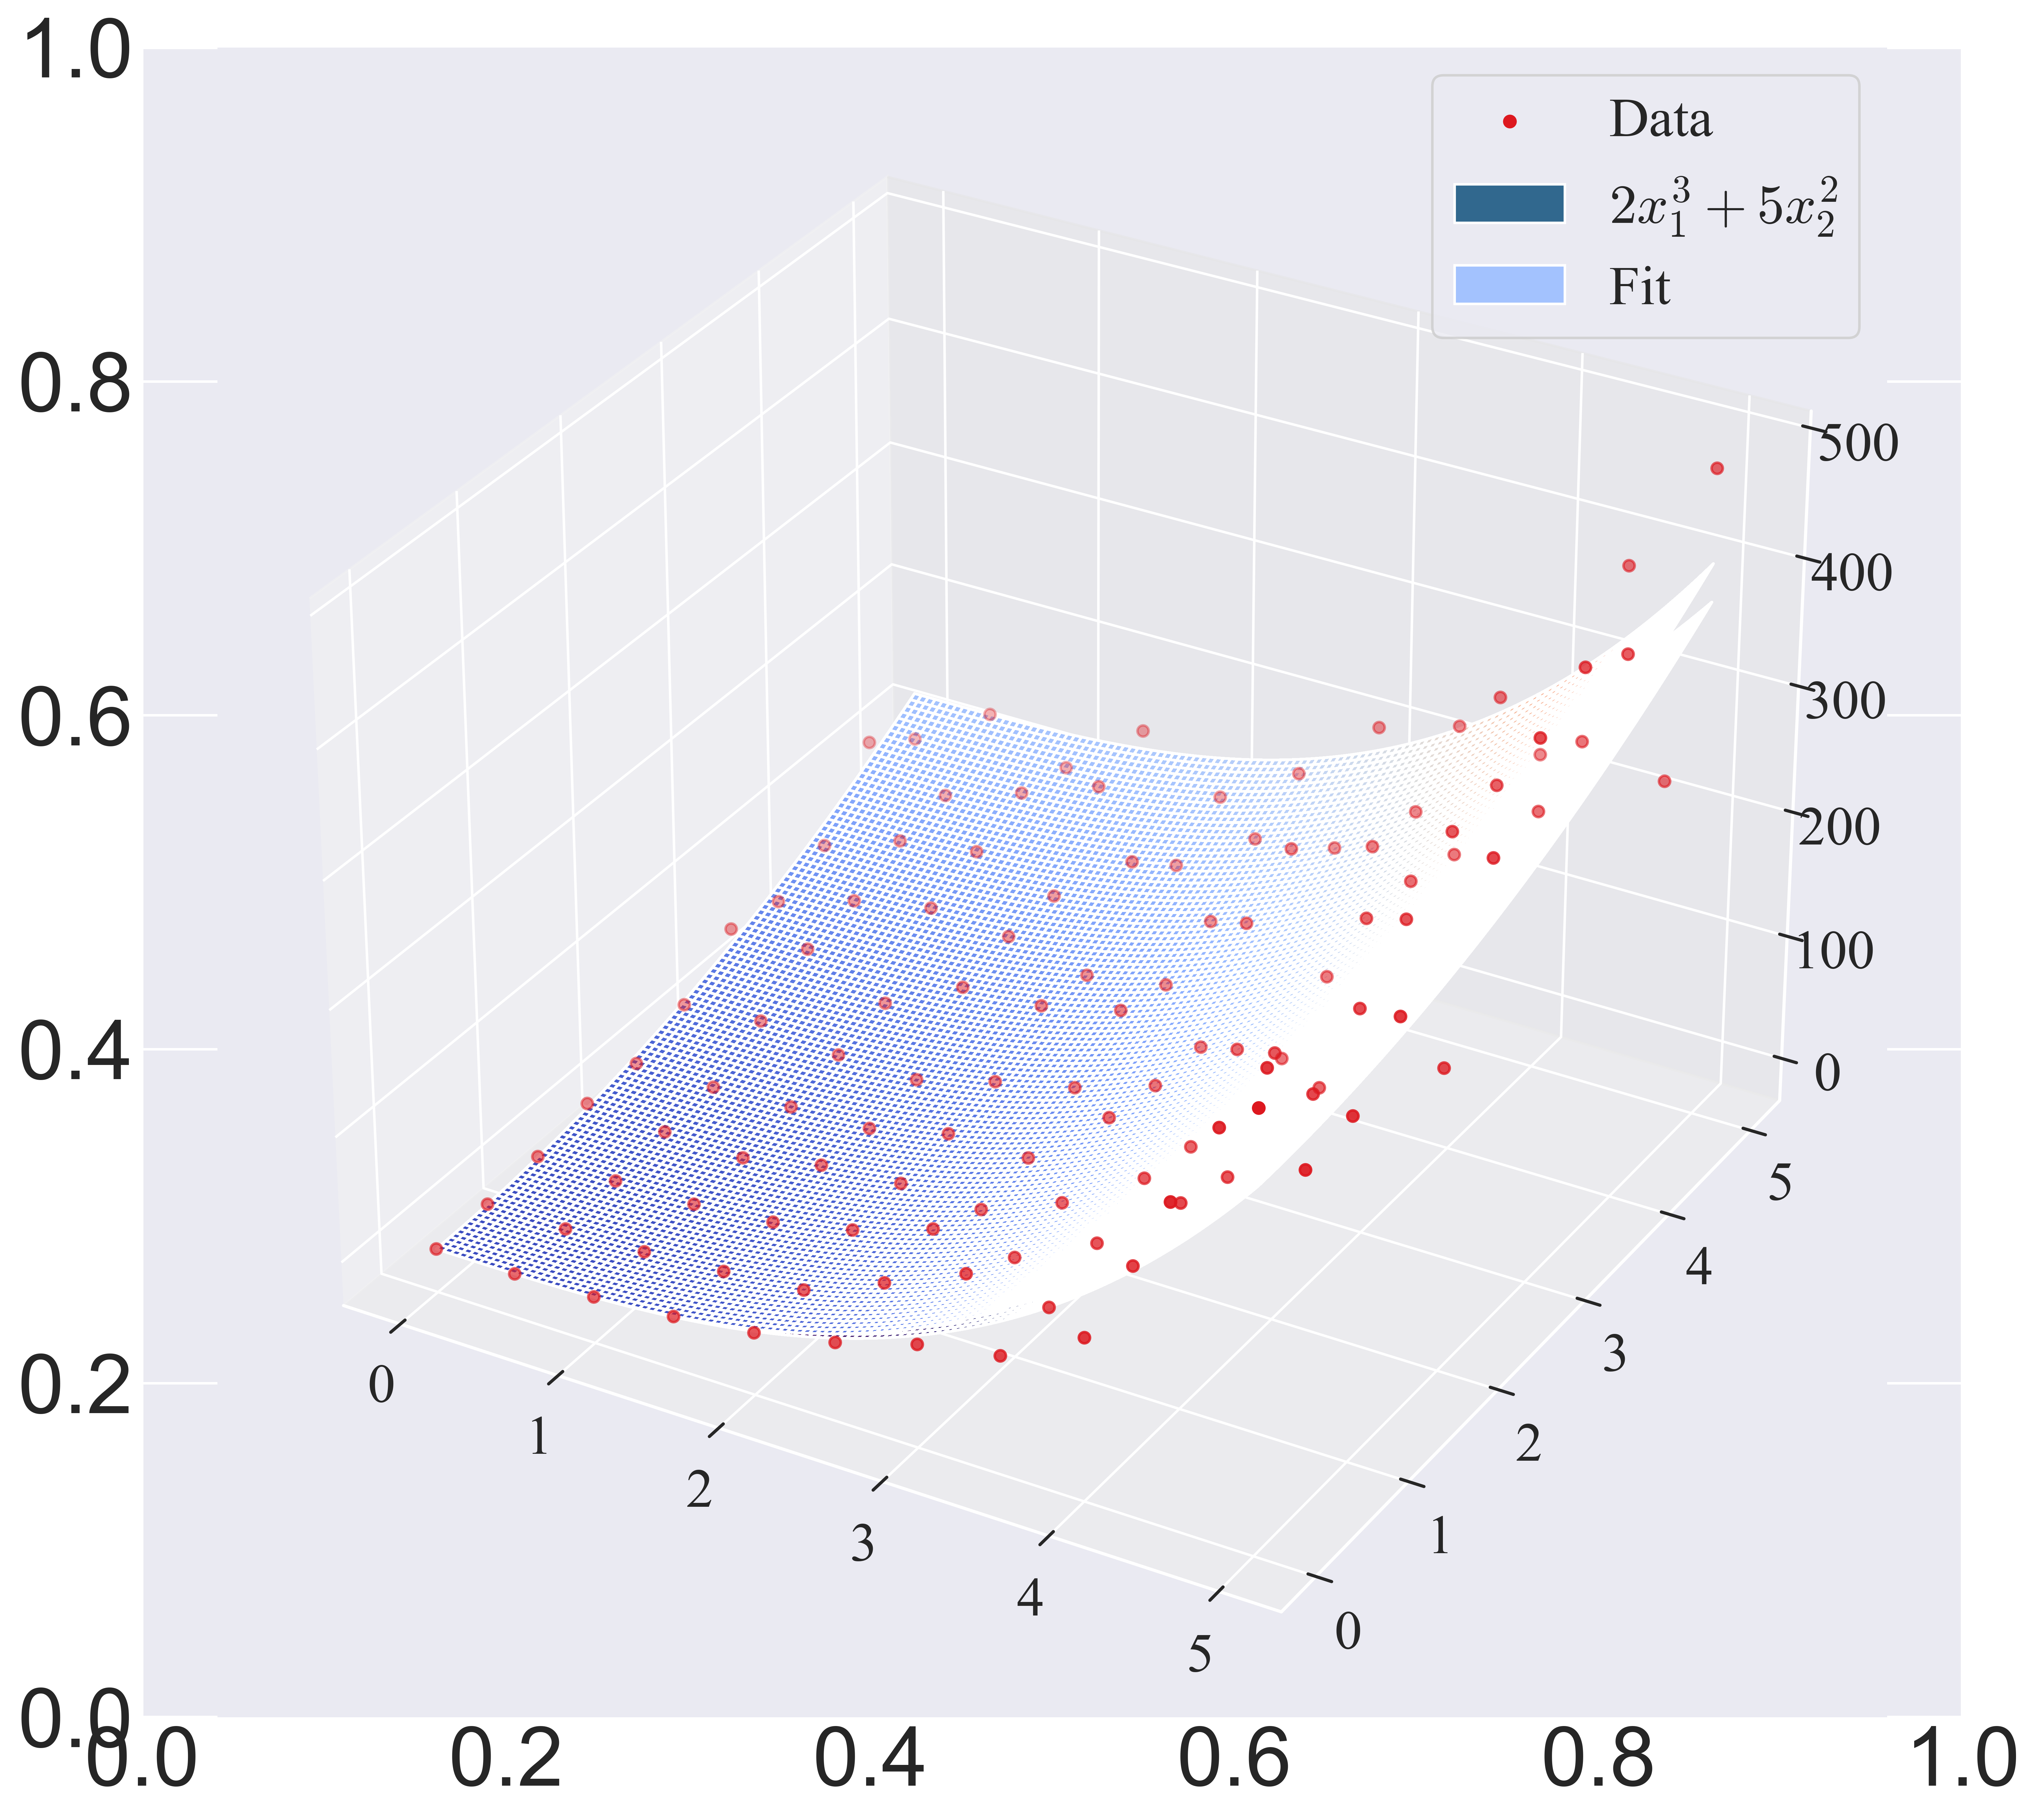

In [43]:
plt.figure(figsize=FS, dpi=DPI)
# Set default sans-serif font
plt.rcParams['font.sans-serif'] = "Times New Roman"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['mathtext.fontset'] = "cm"
plt.tick_params(axis='both', direction='in', length=5)

sns.set_theme(font="Times New Roman", font_scale=2)

lb = 0
ub = 5
#X, Y = np.meshgrid(x_data, y_data)
#Z = objective_function(X, Y) + np.random.rand(npoints)*(3+1)-1

x_fun = np.linspace(lb, ub, npoints*10)
y_fun = np.linspace(lb, ub, npoints*10)
X_fun, Y_fun = np.meshgrid(x_fun, y_fun)
fun = objective_function(X_fun, Y_fun)
z_data_fit = fitted_function(X_fun, Y_fun)

ax = plt.axes(projection='3d')
ax.scatter3D(x_data, y_data, z_data, label="Data", color=RED)
ax.plot_surface(X_fun, Y_fun, fun, rstride=1, cstride=1, label="$2x_1^3 + 5x_2^2$", cmap='viridis', antialiased=False)
ax.plot_surface(X_fun, Y_fun, z_data_fit, rstride=1, cstride=1, label="Fit", cmap='coolwarm', antialiased=False)
ax.legend(loc='best')

In [25]:
D = 4
lb = 0
ub = 5
npoints = 11

In [26]:
def fitness_function(params):
    a1, a2, b1, b2 = params
#    b1 = nint(b1)
#    b2 = nint(b2)
    predicted = a1 * x_data**b1 + a2 * y_data**b2
    diff = predicted - z_data
    mae = np.mean(np.abs(diff))
    return mae

In [27]:
ME = 500
PS = 100

lb =  0
ub = 10
problem_dict3 = {
    "bounds": FloatVar(lb=(lb,) * D, ub=(ub,) * D, name="delta"),
    "obj_func": fitness_function,
    "minmax": "min",
    "log_to": None, #"file",
#    "log_file": "result.log",
}

model1 = PSO.AIW_PSO(epoch=ME, pop_size=PS, c1=2.05, c2=2.05, alpha=0.8)
model2 = PSO.OriginalPSO(epoch=ME, pop_size=PS, c1=2.05, c2=2.05, w_min=0.7, w_max=0.8)
model3 = MFO.OriginalMFO(epoch=ME, pop_size=PS)
model4 = EFO.DevEFO(epoch=ME, pop_size=PS, r_rate = 0.3, ps_rate = 0.95, p_field = 0.3, n_field = 0.5)
model5 = ASO.OriginalASO(epoch=ME, pop_size=PS, alpha = 50, beta = 0.2)
model6 = MA.OriginalMA(epoch=ME, pop_size=PS, pc = 0.85, pm = 0.15, p_local = 0.5, max_local_gens = 10, bits_per_param = 4)
model7 = ACOR.OriginalACOR(epoch=ME, pop_size=PS, sample_count = 25, intent_factor = 0.5, zeta = 1.0)
model8 = BBO.DevBBO(epoch=ME, pop_size=PS, p_m=0.01, n_elites=2)
model9 = GSKA.DevGSKA(epoch=ME, pop_size=PS, pb = 0.1, kr = 0.9)
model10= SA.GaussianSA(epoch=ME, pop_size=2, temp_init = 100, cooling_rate = 0.99, scale = 0.1)

g_best1 = model1.solve(problem_dict3)
model = model1
g_best = g_best1
nm = 1
g_best2 = model2.solve(problem_dict3)
if (g_best2.target.fitness < g_best.target.fitness):
    model = model2
    g_best = g_best2
    nm = 2
g_best3 = model3.solve(problem_dict3)
if (g_best3.target.fitness < g_best.target.fitness):
    model = model3
    g_best = g_best3
    nm = 3
g_best4 = model4.solve(problem_dict3)
if (g_best4.target.fitness < g_best.target.fitness):
    model = model4
    g_best = g_best4
    nm = 4
g_best5 = model5.solve(problem_dict3)
if (g_best5.target.fitness < g_best.target.fitness):
    model = model5
    g_best = g_best5
    nm = 5
g_best6 = model6.solve(problem_dict3)
if (g_best6.target.fitness < g_best.target.fitness):
    model = model6
    g_best = g_best6
    nm = 6
g_best7 = model7.solve(problem_dict3)
if (g_best7.target.fitness < g_best.target.fitness):
    model = model7
    g_best = g_best7
    nm = 7
g_best8 = model8.solve(problem_dict3)
if (g_best8.target.fitness < g_best.target.fitness):
    model = model8
    g_best = g_best8
    nm = 8
g_best9 = model9.solve(problem_dict3)
if (g_best9.target.fitness < g_best.target.fitness):
    model = model9
    g_best = g_best9
    nm = 9
g_best10 = model10.solve(problem_dict3)
if (g_best10.target.fitness < g_best.target.fitness):
    model = model10
    g_best = g_best10
    nm = 10

print(f"Model: {model1.name}, Solution: {g_best1.solution}, Fitness: {g_best1.target.fitness}")
print(f"Model: {model2.name}, Solution: {g_best2.solution}, Fitness: {g_best2.target.fitness}")
print(f"Model: {model3.name}, Solution: {g_best3.solution}, Fitness: {g_best3.target.fitness}")
print(f"Model: {model4.name}, Solution: {g_best4.solution}, Fitness: {g_best4.target.fitness}")
print(f"Model: {model5.name}, Solution: {g_best5.solution}, Fitness: {g_best5.target.fitness}")
print(f"Model: {model6.name}, Solution: {g_best6.solution}, Fitness: {g_best6.target.fitness}")
print(f"Model: {model7.name}, Solution: {g_best7.solution}, Fitness: {g_best7.target.fitness}")
print(f"Model: {model8.name}, Solution: {g_best8.solution}, Fitness: {g_best8.target.fitness}")
print(f"Model: {model9.name}, Solution: {g_best9.solution}, Fitness: {g_best9.target.fitness}")
print(f"Model: {model10.name}, Solution: {g_best10.solution}, Fitness: {g_best10.target.fitness}")

print("Best model: ")
print(f"#{nm}, Model: {model.name}, Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")

Model: AIW_PSO, Solution: [0.71403701 5.79114494 3.76966742 1.94033411], Fitness: 18.729908153206956
Model: OriginalPSO, Solution: [0.69795468 5.82609207 3.78497123 1.93476271], Fitness: 18.718960284403618
Model: OriginalMFO, Solution: [0.70594262 5.70400062 3.77790057 1.94758653], Fitness: 18.718586504961344
Model: DevEFO, Solution: [0.71043753 5.63636938 3.77395692 1.95481323], Fitness: 18.7184250044123
Model: OriginalASO, Solution: [2.43014247 1.52727315 2.94296441 2.66696276], Fitness: 22.012700431540896
Model: OriginalMA, Solution: [1.33333333 5.33333333 3.33333333 2.        ], Fitness: 19.383334738587116
Model: OriginalACOR, Solution: [3.64074386 4.50461925 2.66920645 2.02589325], Fitness: 21.637778666173197
Model: DevBBO, Solution: [3.52159563 2.48162449 2.69469181 2.41497712], Fitness: 21.390566849039793
Model: DevGSKA, Solution: [0.71373766 5.60928169 3.77107726 1.95751038], Fitness: 18.71889982384111
Model: GaussianSA, Solution: [1.52046674 9.94194302 3.22164798 1.56700038], 

In [28]:
def fitted_function(x, y):
    a1, a2, b1, b2 = g_best.solution
    f = a1 * x**b1 + a2 * y**b2
    return f

In [29]:
xx = x_data[18]
yy = y_data[18]
zz = z_data[18]
print(f"x_data: {xx}")
print(f"y_data: {yy}")
print(f"z_data: {zz}")
print(f"z_function: {objective_function(xx,yy)}")
print(f"z_fitted: {fitted_function(xx,yy)}")

x_data: 0.5
y_data: 3.5
z_data: 67.97350415
z_function: 61.5
z_fitted: 65.29747844419622


In [30]:
def objective_function(x):
    f = np.sin(x[0]) + np.sin(10.*x[0]/3.)
    return f

def fitness_function(a):
    predicted = np.sin(x_data) + np.sin(a[0] * x_data)
    diff = predicted - y_data
    mae = np.mean(np.abs(diff))
    return mae

In [31]:
from halo import HALO

bounds = [[lb, ub]] # bounds is a list or numpy array where in the
# first column there are the lower bounds
# and in the second column the upper bounds
# e.g. [[x_min., x_max], [y_min, y_max]]
max_feval = ME  # maximum number of function evaluations
max_iter = ME  # maximum number of iterations
beta = 1e-3  # beta controls the usage of the local optimizers during the optimization process
# With a lower value of beta HALO will use the local search more rarely and vice-versa.
# The parameter beta must be less than or equal to 1e-2 or greater than equal to 1e-4.
local_optimizer = 'L-BFGS-B' # Choice of local optimizer from scipy python library.
# The following optimizers are available: 'L-BFGS-B', 'Nelder-Mead', 'TNC' and 'Powell'.
# For more infomation about the local optimizers please refer the scipy documentation.
verbose = 0  # this controls the verbosity level, fixed to 0 no output of the optimization progress will be printed.

halo = HALO(fitness_function, bounds, max_feval, max_iter, beta, local_optimizer, verbose)
results = halo.minimize()
# results is a dictionary where each key value pair contains a particular information about the optimization process carried out by HALO. 
# For example, with the keys 'best_x', 'best_f' and 'best_feval' we can access the best decision variable, its function value, and the number 
# of function evaluations when it has been obtained.
best_x, best_f, best_feval = results['best_x'],  results['best_f'],  results['best_feval']

Global Optimization Procedure Completed


In [32]:
print("",g_best.solution[0],"\n", best_x[0],"\n", g_best.target.fitness,"\n", best_f)

 0.7104375295373857 
 0.39627632877116964 
 18.7184250044123 
 1.986945419511125
